# DS4300 P02 - RAG Indexing Analysis

In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [65]:
df = pd.read_csv('../data/experiment_data/experiment_results.csv')
df.head()

,embedding_model,llm_model,db_type,base_prompt,base_prompt_id,query,query_id,response,response_similarity_to_query,num_documents,total_chunks,time_taken_to_index,mem_taken_to_index,time_taken_to_rag,mem_taken_to_rag
0,bge-large,tinyllama:latest,ChromaConnector,You are an AI assistant. Use the following con...,-3833234071831582360,What is an AVL tree?,-4693267576719729811,An AVL (Asymmetric Binary Tree) is a type of b...,0.859030,15,289,1.955591,1.902344,3.199730,-0.792969
1,bge-large,tinyllama:latest,ChromaConnector,You are an AI assistant. Use the following con...,-3833234071831582360,How are document databases different from rela...,-7897790678525327261,The context provided suggests that the questio...,0.901430,15,289,1.955591,1.902344,4.606488,-0.632812
2,bge-large,tinyllama:latest,ChromaConnector,You are an AI assistant. Use the following con...,-3833234071831582360,What is an elephant?,-3925786883401567255,The Elephant is a mythical animal that can be ...,0.806036,15,289,1.955591,1.902344,5.914543,-0.539062
3,bge-large,tinyllama:latest,ChromaConnector,You are an AI assistant. Use the following con...,-851420659259980457,What is an AVL tree?,-4693267576719729811,"Sure, here's an accurate answer to the questio...",0.815031,15,289,1.955591,1.902344,3.807320,0.031250
4,bge-large,tinyllama:latest,ChromaConnector,You are an AI assistant. Use the following con...,-851420659259980457,How are document databases different from rela...,-7897790678525327261,The answer provided in the context is that a D...,0.819527,15,289,1.955591,1.902344,6.624219,0.066406


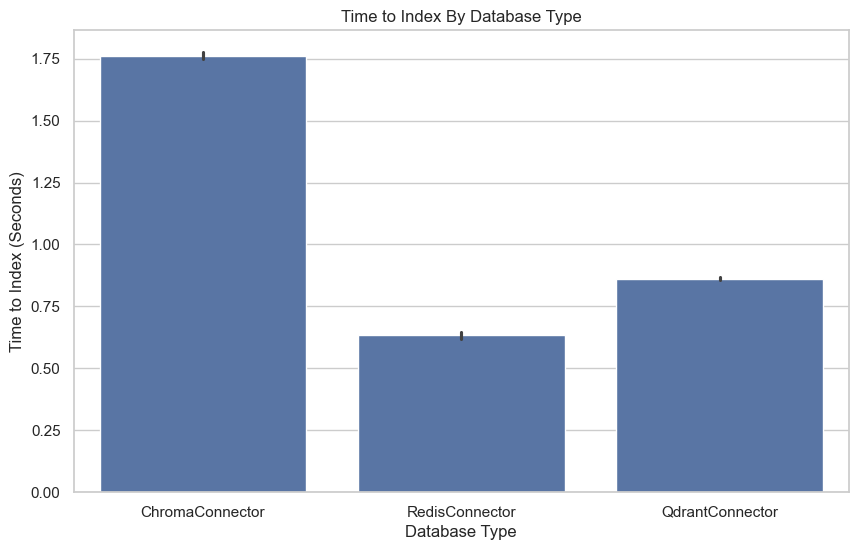

In [66]:
# Boxplot for time to index by database type
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(x='db_type', y='time_taken_to_index', data=df)
plt.title("Time to Index By Database Type")
plt.xlabel("Database Type")
plt.ylabel("Time to Index (Seconds)")
plt.show()

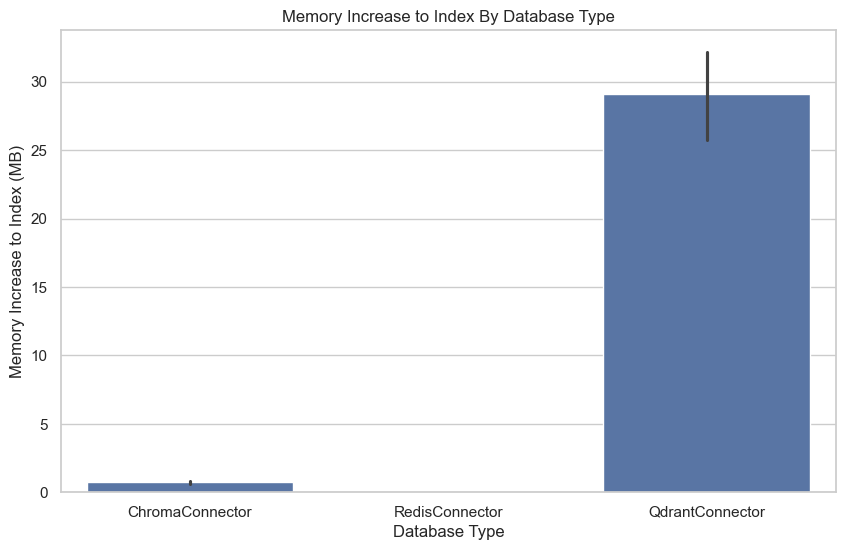

In [67]:
# Boxplot for memory increase to index by database type
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(x='db_type', y='mem_taken_to_index', data=df)
plt.title("Memory Increase to Index By Database Type")
plt.xlabel("Database Type")
plt.ylabel("Memory Increase to Index (MB)")
plt.show()

In [68]:
# Get the memory increase for indexing only for RedisConnector
redis_df = df[df['db_type'] == 'QdrantConnector']
redis_df.head()

,embedding_model,llm_model,db_type,base_prompt,base_prompt_id,query,query_id,response,response_similarity_to_query,num_documents,total_chunks,time_taken_to_index,mem_taken_to_index,time_taken_to_rag,mem_taken_to_rag
324,bge-large,tinyllama:latest,QdrantConnector,You are an AI assistant. Use the following con...,-3833234071831582360,What is an AVL tree?,-4693267576719729811,An AVL (Asymmetric Binary Search) tree is a ty...,0.844600,15,289,0.875446,55.832031,3.020973,1.031250
325,bge-large,tinyllama:latest,QdrantConnector,You are an AI assistant. Use the following con...,-3833234071831582360,How are document databases different from rela...,-7897790678525327261,"The answer to the question ""How are document d...",0.921119,15,289,0.875446,55.832031,4.850090,1.093750
326,bge-large,tinyllama:latest,QdrantConnector,You are an AI assistant. Use the following con...,-3833234071831582360,What is an elephant?,-3925786883401567255,The context suggests that the question is abou...,0.655445,15,289,0.875446,55.832031,5.855878,1.187500
327,bge-large,tinyllama:latest,QdrantConnector,You are an AI assistant. Use the following con...,-851420659259980457,What is an AVL tree?,-4693267576719729811,"The ""AVL"" (or ""Achieve Value for Market"") tree...",0.844983,15,289,0.875446,55.832031,1.914355,0.011719
328,bge-large,tinyllama:latest,QdrantConnector,You are an AI assistant. Use the following con...,-851420659259980457,How are document databases different from rela...,-7897790678525327261,Sure! Document databases differ from relationa...,0.895230,15,289,0.875446,55.832031,4.816854,0.011719


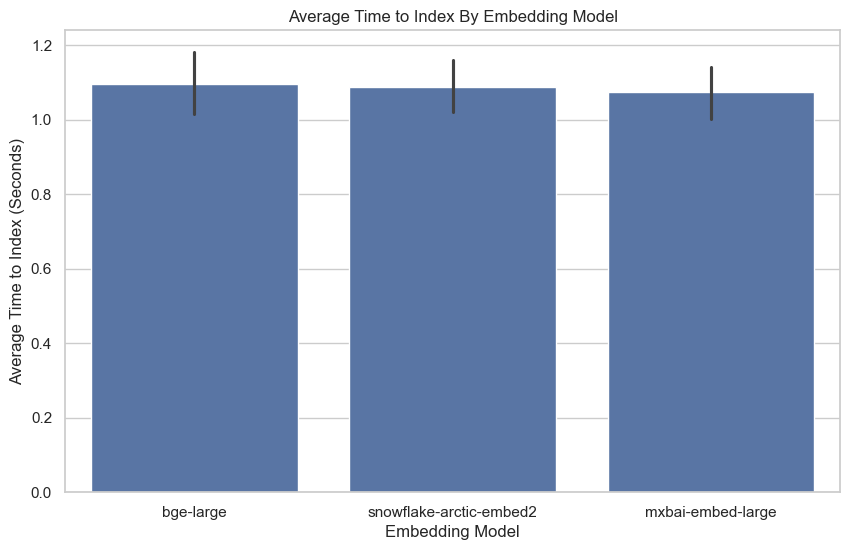

In [69]:
# Average time by embedding model type
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(x='embedding_model', y='time_taken_to_index', data=df)
plt.title("Average Time to Index By Embedding Model")
plt.xlabel("Embedding Model")
plt.ylabel("Average Time to Index (Seconds)")
plt.show()

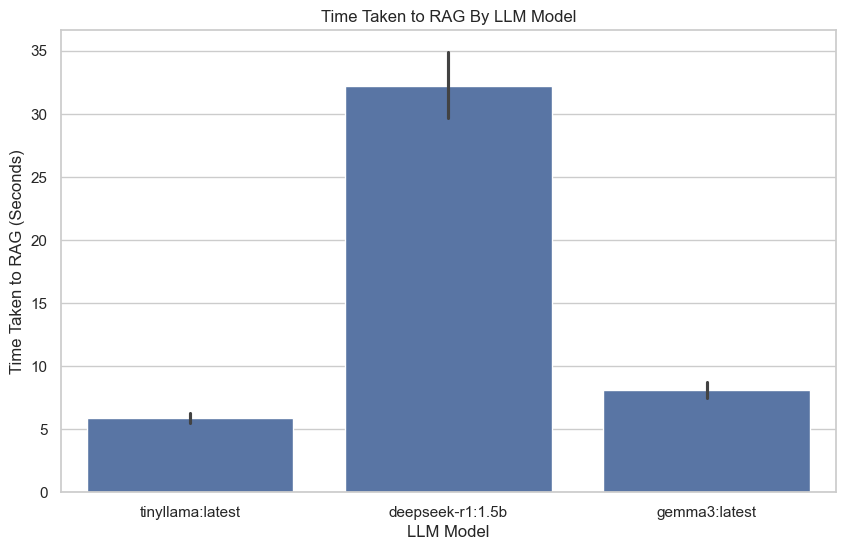

In [70]:
# Time taken to RAG by LLM model
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(x='llm_model', y='time_taken_to_rag', data=df)
plt.title("Time Taken to RAG By LLM Model")
plt.xlabel("LLM Model")
plt.ylabel("Time Taken to RAG (Seconds)")
plt.show()

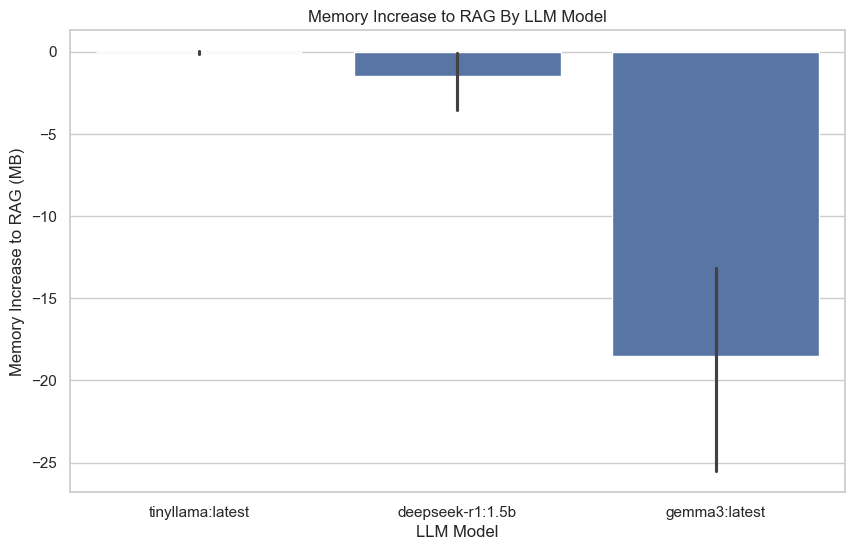

In [71]:
# Memory increase to RAG by LLM model
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(x='llm_model', y='mem_taken_to_rag', data=df)
plt.title("Memory Increase to RAG By LLM Model")
plt.xlabel("LLM Model")
plt.ylabel("Memory Increase to RAG (MB)")
plt.show()

In [72]:
# Check for any records where sentence-to-query similarity is 0
zero_similarity_df = df[df['response_similarity_to_query'].isna()]
zero_similarity_df.head()

,embedding_model,llm_model,db_type,base_prompt,base_prompt_id,query,query_id,response,response_similarity_to_query,num_documents,total_chunks,time_taken_to_index,mem_taken_to_index,time_taken_to_rag,mem_taken_to_rag
18,bge-large,deepseek-r1:1.5b,ChromaConnector,You are an AI assistant. Use the following con...,-3833234071831582360,What is an AVL tree?,-4693267576719729811,"<think>\nOkay, I need to explain what an AVL t...",NaN,15,289,1.84755,0.5,21.774669,-0.031250
20,bge-large,deepseek-r1:1.5b,ChromaConnector,You are an AI assistant. Use the following con...,-3833234071831582360,What is an elephant?,-3925786883401567255,"<think>\nAlright, so I need to figure out what...",NaN,15,289,1.84755,0.5,55.500570,0.011719
22,bge-large,deepseek-r1:1.5b,ChromaConnector,You are an AI assistant. Use the following con...,-851420659259980457,How are document databases different from rela...,-7897790678525327261,"<think>\nOkay, so I'm trying to figure out how...",NaN,15,289,1.84755,0.5,33.389727,0.011719
24,bge-large,deepseek-r1:1.5b,ChromaConnector,You are a genius AI assistant. Use the followi...,-5222307236899968458,What is an AVL tree?,-4693267576719729811,"<think>\nAlright, let's tackle this question s...",NaN,15,289,1.84755,0.5,15.736496,0.000000
26,bge-large,deepseek-r1:1.5b,ChromaConnector,You are a genius AI assistant. Use the followi...,-5222307236899968458,What is an elephant?,-3925786883401567255,"<think>\nOkay, so the user asked, ""What is an ...",NaN,15,289,1.84755,0.5,41.148010,0.019531


In [73]:
for col in ['embedding_model', 'llm_model', 'db_type', 'base_prompt_id', 'query_id']:
    print(f"{col}: {zero_similarity_df[col].unique()}")

embedding_model: ['bge-large']
llm_model: ['deepseek-r1:1.5b']
db_type: ['ChromaConnector' 'RedisConnector' 'QdrantConnector']
base_prompt_id: [-3833234071831582360  -851420659259980457 -5222307236899968458
 -7732791809183758154 -8200962781058084099 -8403393780183141815]
query_id: [-4693267576719729811 -3925786883401567255 -7897790678525327261]


In [74]:
# Which base prompt didn't have a NaN response?
zero_similarity_df.loc[:, ['base_prompt_id', 'base_prompt']].drop_duplicates()

,base_prompt_id,base_prompt
18,-3833234071831582360,You are an AI assistant. Use the following con...
22,-851420659259980457,You are an AI assistant. Use the following con...
24,-5222307236899968458,You are a genius AI assistant. Use the followi...
27,-7732791809183758154,You are a genius AI assistant. Use the followi...
30,-8200962781058084099,Use the following context to answer the query ...
33,-8403393780183141815,Use the following context to answer the query ...


Looks like across all the DB connectors, DeepSeek R1 with BGE large embedding model has issues with sentence-to-query similarity. That too, for 7/7 base prompts.

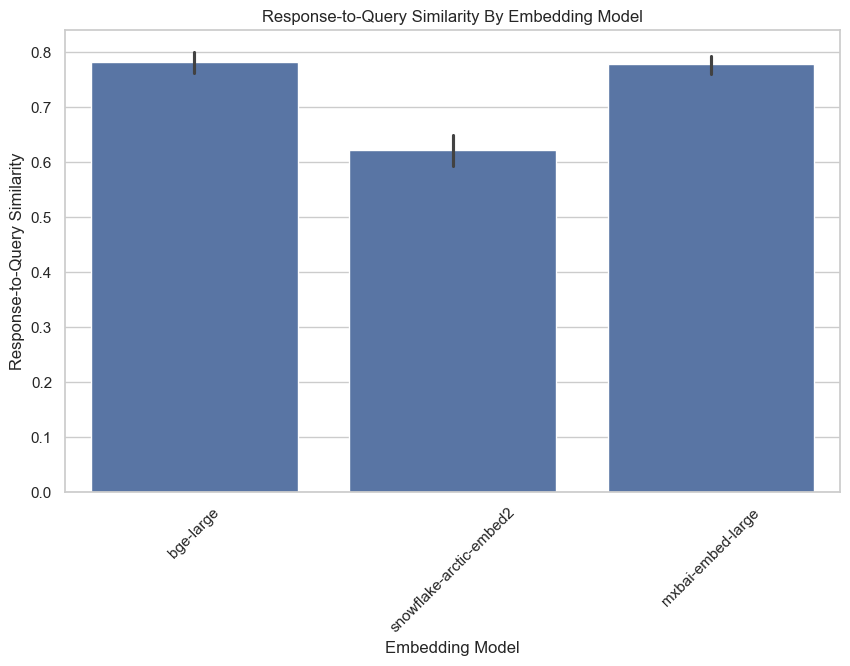

In [75]:
# Response-to-query similarity by embedding model
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(x='embedding_model', y='response_similarity_to_query', data=df)
plt.title("Response-to-Query Similarity By Embedding Model")
plt.xlabel("Embedding Model")
plt.ylabel("Response-to-Query Similarity")
plt.xticks(rotation=45)
plt.show()

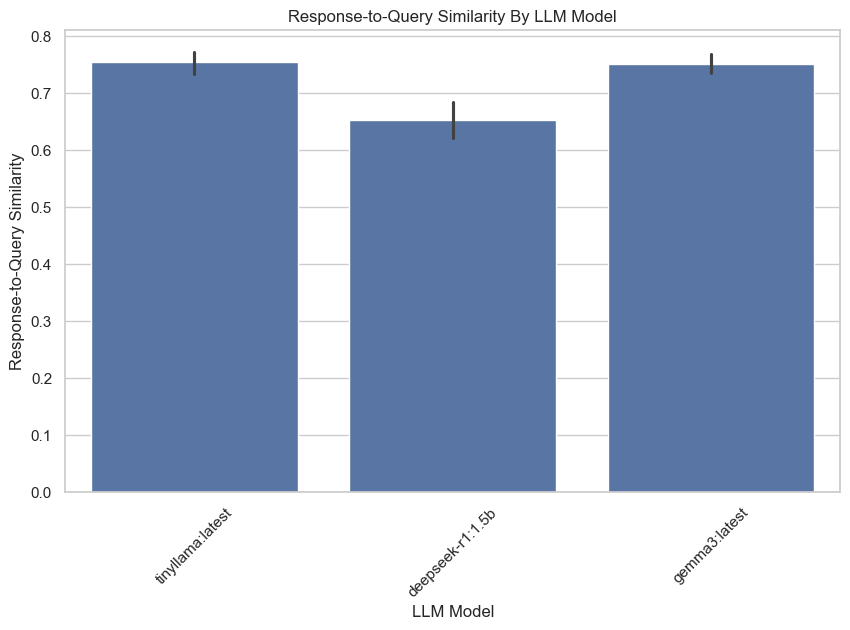

In [76]:
# Response-to-query similarity by LLM model
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(x='llm_model', y='response_similarity_to_query', data=df)
plt.title("Response-to-Query Similarity By LLM Model")
plt.xlabel("LLM Model")
plt.ylabel("Response-to-Query Similarity")
plt.xticks(rotation=45)
plt.show()

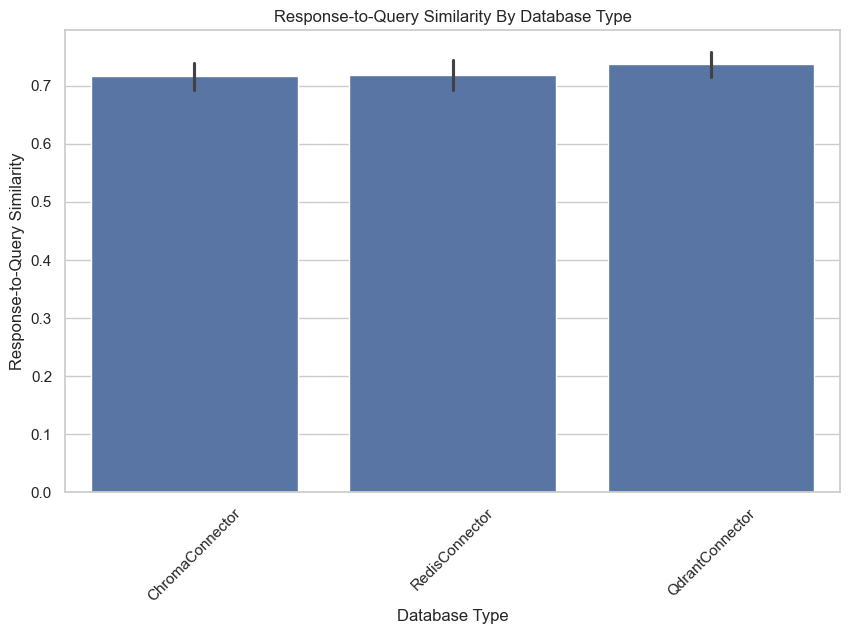

In [77]:
# Response-to-query similarity by database type
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(x='db_type', y='response_similarity_to_query', data=df)
plt.title("Response-to-Query Similarity By Database Type")
plt.xlabel("Database Type")
plt.ylabel("Response-to-Query Similarity")
plt.xticks(rotation=45)
plt.show()

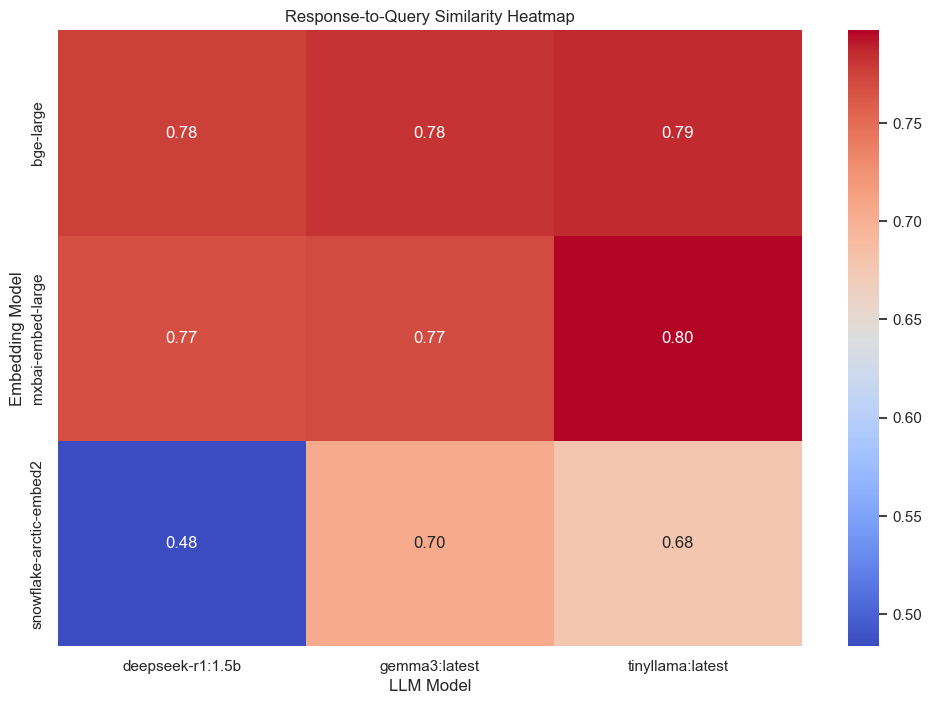

In [78]:
# Heatmap of response-to-query similarity by embedding model and LLM model
heatmap_data = df.pivot_table(index='embedding_model', columns='llm_model', values='response_similarity_to_query', aggfunc='mean')
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Response-to-Query Similarity Heatmap")
plt.xlabel("LLM Model")
plt.ylabel("Embedding Model")
plt.show()

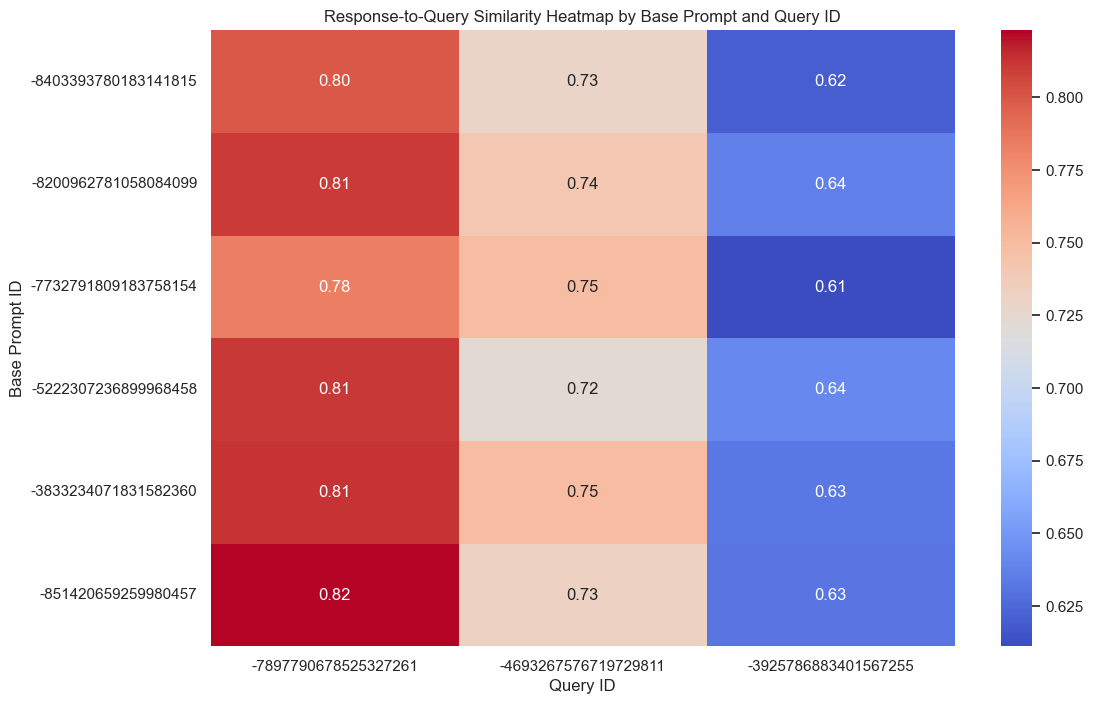

In [79]:
# Base prompt ID and query ID heatmap for response-to-query similarity
heatmap_data = df.pivot_table(index='base_prompt_id', columns='query_id', values='response_similarity_to_query', aggfunc='mean')
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Response-to-Query Similarity Heatmap by Base Prompt and Query ID")
plt.xlabel("Query ID")
plt.ylabel("Base Prompt ID")
plt.show()

In [80]:
df['query_id'].value_counts()

query_id
-4693267576719729811    162
-7897790678525327261    162
-3925786883401567255    162
Name: count, dtype: int64